## Question 1

In [75]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### a)

$ f(x) = \begin{cases} 
      x^2 - 1 & -\pi \leq x < 0 \\
      \ xe^{(-x/2)} & 0 \leq x \leq \pi 
   \end{cases}
$

$ eq1= x^2 - 1 $

$ eq2= xe^{(-x/2)} $


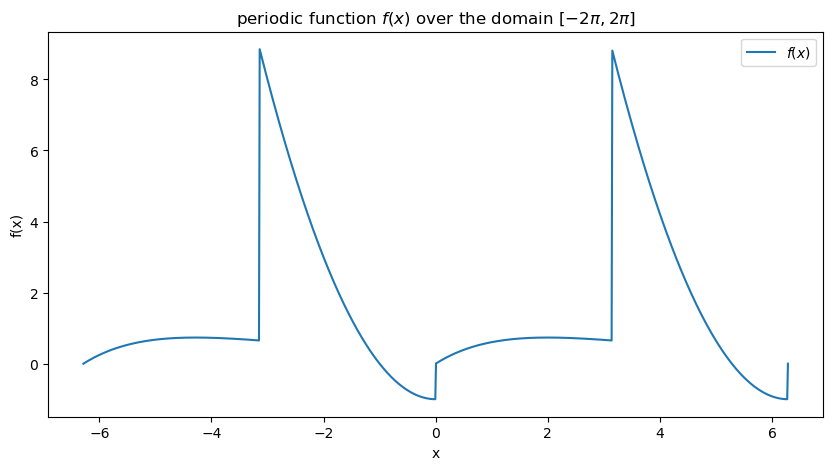

In [76]:
x = sp.symbols('x')
n = sp.symbols('n', positive=True, integer=True)

eq1=(x**2)-1
eq2=sp.exp(-x/2)*x

eq1_numerical=sp.lambdify(x,eq1,'numpy')
eq2_numerical=sp.lambdify(x,eq2,'numpy')

def f_x(x):
    if x<-np.pi:
        x+=2*np.pi
        return f_x(x)
    elif x>np.pi:
        x-=2*np.pi
        return f_x(x)
    
    if 0<=x<np.pi:
        return eq2_numerical(x)
    elif -np.pi <=x < 0:
        return eq1_numerical(x)

x_values = np.linspace(-2 * np.pi, 2* np.pi, 1000)
y_values = [f_x(x) for x in x_values]

plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='$f(x)$')
plt.title('periodic function $f(x)$ over the domain $[-2\pi, 2\pi]$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()



#### b)

$a_0$ for periodic function $f(x)$ is given by: $a_0 = \int_{-\pi}^{\pi} f(x) dx $

Since: $ f(x) = \begin{cases} 
      x^2 - 1 & -\pi \leq x < 0 \\
      \ xe^{(-x/2)} & 0 \leq x \leq \pi 
   \end{cases}
$  , $a_0 = \int_{-\pi}^{0} x^2 -1 dx + \int_{0}^{\pi} e ^ {-x/2} dx$

In [77]:
a_0= 1/sp.pi*(eq1.integrate((x, -sp.pi,0))+eq2.integrate((x, 0, sp.pi)))
a_0


(-pi + (-2*pi - 4)*exp(-pi/2) + 4 + pi**3/3)/pi

$a_n$ for periodic function $f(x)$ is given by: $a_n = \int_{-\pi}^{\pi} f(x) con(nx) dx $

Since: $ f(x) = \begin{cases} 
      x^2 - 1 & -\pi \leq x < 0 \\
      \ xe^{(-x/2)} & 0 \leq x \leq \pi 
   \end{cases}
$  , $a_n = \int_{-\pi}^{0} (x^2 -1) cos(x) dx + \int_{0}^{\pi} (e ^ {-x/2}) cos(x) dx$

In [78]:
a_n = 1/sp.pi*((eq1*sp.cos(n*x)).integrate((x, -sp.pi,0))+(eq2*sp.cos(n*x)).integrate((x, 0, sp.pi)))
a_n

(-8*(-1)**n*pi*n**2/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) + 16*(-1)**n*n**2/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 2*(-1)**n*pi/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 4*(-1)**n/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) + 2*(-1)**n*pi/n**2 - 16*n**2/(16*n**4 + 8*n**2 + 1) + 4/(16*n**4 + 8*n**2 + 1))/pi

$b_n$ for periodic function $f(x)$ is given by:$a_n = \int_{-\pi}^{\pi} f(x) sin(nx) dx $

Since: $ f(x) = \begin{cases} 
      x^2 - 1 & -\pi \leq x < 0 \\
      \ xe^{(-x/2)} & 0 \leq x \leq \pi 
   \end{cases}
$  , $b_n = \int_{-\pi}^{0} (x^2 -1) sin(x) dx + \int_{0}^{\pi} (e ^ {-x/2}) sin(x) dx$

In [79]:

b_n =1 /sp.pi*((eq1*sp.sin(n*x)).integrate((x, -sp.pi,0))+(eq2*sp.sin(n*x)).integrate((x, 0, sp.pi)))
b_n

(-16*(-1)**n*pi*n**3/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 16*(-1)**n*n/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 4*(-1)**n*pi*n/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - (-1)**n/n + (-1)**n*pi**2/n - 2*(-1)**n/n**3 + 16*n/(16*n**4 + 8*n**2 + 1) + 1/n + 2/n**3)/pi

Fourier representation of f(x) is given by: $f(X)= a_0 + \sum_{n=0}^{\infty}  {a_n cos(nx)+ b_n sin(nx)}$

In [80]:
# a method to create fourier representation of f(x) upto a given limit
def fourier_series_expansion(upper):
    f = a_0/2 + sp.Sum((a_n*sp.cos(n*x) + (b_n*sp.sin(n*x))),(n, 1, upper))
    return f

fourier_series_expansion(np.inf)

Sum((-8*(-1)**n*pi*n**2/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) + 16*(-1)**n*n**2/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 2*(-1)**n*pi/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 4*(-1)**n/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) + 2*(-1)**n*pi/n**2 - 16*n**2/(16*n**4 + 8*n**2 + 1) + 4/(16*n**4 + 8*n**2 + 1))*cos(n*x)/pi + (-16*(-1)**n*pi*n**3/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 16*(-1)**n*n/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - 4*(-1)**n*pi*n/(16*n**4*exp(pi/2) + 8*n**2*exp(pi/2) + exp(pi/2)) - (-1)**n/n + (-1)**n*pi**2/n - 2*(-1)**n/n**3 + 16*n/(16*n**4 + 8*n**2 + 1) + 1/n + 2/n**3)*sin(n*x)/pi, (n, 1, oo)) + (-pi + (-2*pi - 4)*exp(-pi/2) + 4 + pi**3/3)/(2*pi)

#### c)

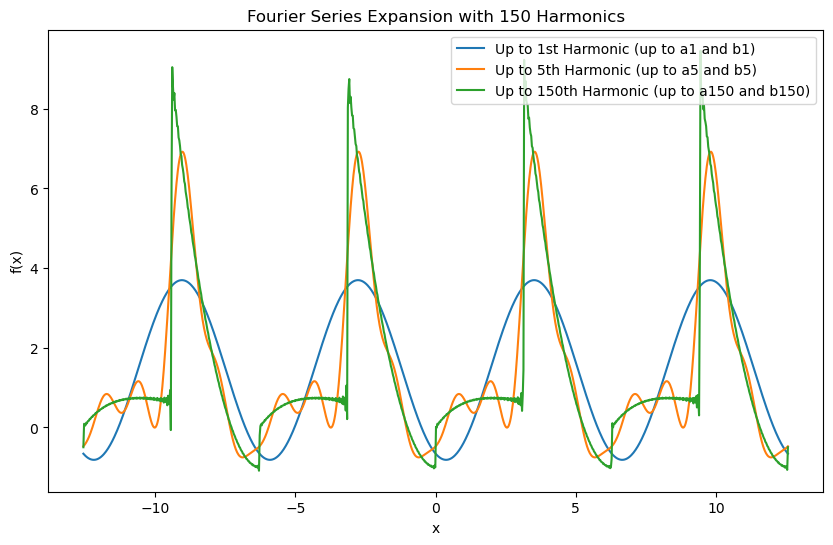

In [81]:
#Fourier series expansion upto first harmonic 
f_1=fourier_series_expansion(1)
#Fourier series expansion upto fifth harmonic 
f_5=fourier_series_expansion(5)
#Fourier series expansion upto one hundred and fiftieth harmonic 
f_150=fourier_series_expansion(150)

#Lambdify above obtained equations
f_1_numeric = sp.lambdify(x, f_1, 'numpy')
f_5_numeric = sp.lambdify(x, f_5, 'numpy')
f_150_numeric = sp.lambdify(x, f_150, 'numpy')

# Generate x values for plotting
x_values = np.linspace(-4 * np.pi, 4 * np.pi, 1000)

# Evaluate the Fourier series for each x
y_values_1 = f_1_numeric(x_values)
y_values_5 = f_5_numeric(x_values)
y_values_150 = f_150_numeric(x_values)
# Get the actual values for y using the function created in part A
y_actual_values=[f_x(x) for x in x_values]

# Plot the Fourier series expansion
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_1, label='Up to 1st Harmonic (up to a1 and b1)')
plt.plot(x_values, y_values_5, label='Up to 5th Harmonic (up to a5 and b5)')
plt.plot(x_values, y_values_150, label='Up to 150th Harmonic (up to a150 and b150)')
plt.title('Fourier Series Expansion with 150 Harmonics')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### d)  
##### a) RMSE between $f(x)$ and first harmonic

In [82]:
mean_squared_diff = np.mean((y_actual_values - y_values_1)**2)
rmse_1 = np.sqrt(mean_squared_diff)
rmse_1

1.5879205300651382

##### b) RMSE between $f(x)$ and fifth harmonic

In [83]:
mean_squared_diff = np.mean((y_actual_values-y_values_5)**2)
rmse_5 = np.sqrt(mean_squared_diff)
rmse_5

0.8026629487926213

##### c) RMSE between $f(x)$ and hundred and fiftieth harmonic

In [84]:
mean_squared_diff = np.mean((y_actual_values-y_values_150)**2)
rmse_150 = np.sqrt(mean_squared_diff)
rmse_150

0.14699397455002863

RMSE values between $f(x)$ and each of the harmonics from 0 to 150 harmonic

[1.5879205300651382, 1.1428101241512216, 1.012676549828191, 0.864794147717528, 0.8026629487926213, 0.7232043381001528, 0.685386671815618, 0.6340160726556093, 0.6079825343329581, 0.5713028265133197, 0.551998563383821, 0.5241260941245098, 0.5090818482064464, 0.48697659915490193, 0.47482736948606535, 0.45674019010048456, 0.4466629484539632, 0.4315070132115694, 0.4229724767280826, 0.4100322983875365, 0.4026827155401479, 0.3914655202228695, 0.38504930398589665, 0.3752031760499515, 0.36953758831210676, 0.3608036103599884, 0.3557523076114196, 0.3479351810459584, 0.3433941018534333, 0.3363433674683989, 0.3322315324260207, 0.32582914933007573, 0.322082473554321, 0.31623435968635505, 0.3128013779134944, 0.3074315007230856, 0.304270343693281, 0.29931649964366985, 0.29639271090472874, 0.2918034515646086, 0.28908838197343534, 0.28482073589140144, 0.2822903434871398, 0.2783081013207895, 0.27594204094244473, 0.27221444634007286, 0.26999536981000544, 0.2664961072650202, 0.2644091189141826, 0.261115522

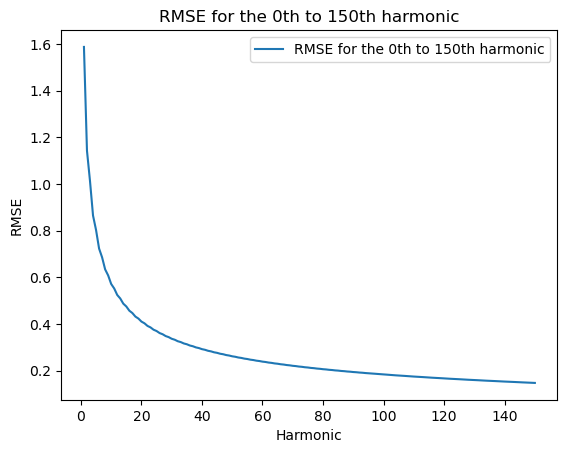

In [85]:
rsme_y_values=[]
for i in range(1, 151):
    f_n =fourier_series_expansion(i)
    f_n_numeric = sp.lambdify(x, f_n, 'numpy')
    y_values_n = f_n_numeric(x_values)

    mean_squared_diff = np.mean((y_actual_values-y_values_n)**2)
    rmse_n = np.sqrt(mean_squared_diff)
    rsme_y_values.append(rmse_n)

print(rsme_y_values)

plt.plot(range(1, 151), rsme_y_values, label='RMSE for the 0th to 150th harmonic')
plt.title('RMSE for the 0th to 150th harmonic')
plt.xlabel('Harmonic')
plt.ylabel('RMSE')
plt.legend()
plt.show()
   